##1. Data Collection-Web Scraping

In [ ]:
#necessary environment
!pip install praw==7.7.1
!pip install pandas==2.2.2
!pip install numpy==1.24.2

import praw
import pandas as pd
import numpy as np
import time

In [ ]:
#Reddit API setting
client_id = "b0PjlScu76ntilQiWfB_LA"
client_secret = "6yRvmF2e10JQimcjELdHc30QVWrWPw"
user_agent = "Ethio"

#connect to Reddit
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


In [ ]:
#Scraping data
subreddit = reddit.subreddit("gaming")  # only select "gaming" subpart
query = "Assassin's Creed Mirage OR Assassin's Creed Shadows OR AC Mirage OR AC Shadows"
time_filter = "week"
limit = 5000   # scrape 5000 posts

#Store data
data = []
for post in subreddit.search(query, limit=limit):
    time.sleep(2)  # give sleep time

    # scrape posts
    post_id = post.id
    post_title = post.title
    post_text = post.selftext
    post_score = post.score
    post_num_comments = post.num_comments
    post_url = post.url
    post_created = post.created_utc

    # scrape comments
    comments = []
    try:
        post.comments.replace_more(limit=0)
        for comment in post.comments.list():
            comments.append(comment.body)
    except Exception as e:
        print(f"failed to scrape comments：{e}")

    # save into lists
    data.append({
        "post_id": post_id,
        "title": post_title,
        "content": post_text,
        "score": post_score,
        "num_comments": post_num_comments,
        "url": post_url,
        "created_utc": post_created,
        "comments": " || ".join(comments)  # append all comments into strings
    })


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
df = pd.DataFrame(data)
df.head()

,post_id,title,content,score,num_comments,url,created_utc,comments
0,1kky3j7,What are your thoughts on Assassins Creed Shad...,"I plan on getting this game next, but I wanted...",9,105,https://www.reddit.com/r/gaming/comments/1kky3...,1.747070e+09,"I put a lot of hours in, so here's the good an..."
1,1mqpe4q,Gaming community,"Hey guys, I’m not usually the type to post on ...",0,38,https://www.reddit.com/r/gaming/comments/1mqpe...,1.755238e+09,You're conflating very different groups. You'r...
2,1jhijvm,Assassin's Creed Shadows Hits 2 Million Player...,,12901,3244,https://www.ign.com/articles/assassins-creed-s...,1.742677e+09,I'll give it a go when the prices for it drop....
3,1k95lr9,"90 year old, still gaming and loves Assassin’s...",,28401,614,https://i.redd.it/cx1lnm734exe1.jpeg,1.745765e+09,Nursing homes are gonna be so lit in the futur...
4,1jg4v9i,Amid Japan Concern About Assassin's Creed Shad...,,11575,1036,https://www.ign.com/articles/amid-japan-concer...,1.742519e+09,I passed a Tori Gate and the game asked me not...


In [ ]:
# Convert to Dataframe and save to CSV
output_file = "AC_Shadow_Reddit_Data.csv"
df.to_csv(output_file, index=False, encoding="utf-8")

##2. Data Processing-Text Preparation

In [ ]:
#environment
!pip install nltk==3.9.1
!pip install regex

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

###2.1 Data Cleanning

In [ ]:
#install matching pandas
import pandas as pd

In [ ]:
#import dataset
df = pd.read_csv('/content/AC_Shadow_Reddit_Data.csv')

In [ ]:
#check datastructure
print(df.head)
print('NaN content portion is:' + str(100*(df['content'].isna().sum() / len(df)))+'%')

<bound method NDFrame.head of      post_id                                              title  \
0    1jhijvm  Assassin's Creed Shadows Hits 2 Million Player...   
1    1jg4v9i  Amid Japan Concern About Assassin's Creed Shad...   
2    1fp1isv  Ubisoft Cancels Press Previews of Assassin's C...   
3    1hca3d9  Assassin's Creed Shadows adds a "canon mode" t...   
4    1g9fdan  Ubisoft Cancels Assassin's Creed Shadows Early...   
..       ...                                                ...   
216   xhs3de                      games that make you feel cool   
217   191awa  [Killzone: Shadow Fall] What I saw and what my...   
218   v2z9k4      Games you keep going back to but never finish   
219   zjbofw  I’m still mad WB patented the nemesis system a...   
220   hvlct2  Does anyone else feel like Ghost of Tsushima i...   

                                               content  score  num_comments  \
0                                                  NaN  12844          3279   
1      

In [ ]:
#Replace NaN content with space
df['text'] = df['title'].fillna('') + ' ' + df['content'].fillna('') + ' ' + df['comments'].fillna('')

#Convert date
df['date'] = pd.to_datetime(df['created_utc'], unit='s')

# Only select necessary collumns
df = df[['score', 'num_comments', 'date', 'text']]

In [ ]:
df.head()

,score,num_comments,date,text
0,12844,3279,2025-03-22 20:59:47,Assassin's Creed Shadows Hits 2 Million Player...
1,11557,1053,2025-03-21 01:00:58,Amid Japan Concern About Assassin's Creed Shad...
2,18138,2726,2024-09-25 10:52:29,Ubisoft Cancels Press Previews of Assassin's C...
3,11673,956,2024-12-12 01:44:30,"Assassin's Creed Shadows adds a ""canon mode"" t..."
4,15580,1317,2024-10-22 11:00:38,Ubisoft Cancels Assassin's Creed Shadows Early...


###2.3 Text processing with NLP techniques

In [ ]:
# Standardised abbreviations and slang
slang_dict = {
    "u": "you",
    "ur": "your",
    "thx": "thanks",
    "idk": "i don't know",
    "imo": "in my opinion",
    "btw": "by the way",
}

def replace_slang(text):
    words = text.split()
    new_words = [slang_dict[word] if word in slang_dict else word for word in words]
    return " ".join(new_words)

# replace slangs
df['clean_text'] = df['text'].apply(replace_slang)


In [ ]:
# Text cleaning
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'http\S+|www\S+', '', text)     # URL
    text = re.sub(r'<.*?>', '', text)               #  HTML tag
    text = re.sub(r'[^\w\s]', '', text)             # punctuation mark
    text = re.sub(r'\d+', '', text)                 # re number
    text = re.sub(r'\s+', ' ', text)
    text = text.lower().strip()
    return text


def tokenize_text(text):
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens, custom_stopwords=None):
    stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)

    return [word for word in tokens if word not in stop_words]


def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Union all processing function
def preprocess_text(text, custom_stopwords=None):
    cleaned_text = clean_text(text)
    tokens = tokenize_text(cleaned_text)
    tokens = lemmatize_tokens(tokens)
    tokens = remove_stopwords(tokens, custom_stopwords)
    return " ".join(tokens)


## Adjust customed Stopwords
'''always adjust stopwords according to Topic modelling, until results are idea.
'''
custom_stopwords = {'game', 'play', 'one', 'people', 'assassin', 'creed', 'shadow', 'ac','feel'}  # self defined stop words


#apply to each text
df['ready_text'] = df['clean_text'].apply(lambda x: preprocess_text(x, custom_stopwords))

In [ ]:
#check cleaned text
df.head()


,score,num_comments,date,text,clean_text,ready_text
0,12844,3279,2025-03-22 20:59:47,Assassin's Creed Shadows Hits 2 Million Player...,Assassin's Creed Shadows Hits 2 Million Player...,hit million player day release ubisoft say sur...
1,11557,1053,2025-03-21 01:00:58,Amid Japan Concern About Assassin's Creed Shad...,Amid Japan Concern About Assassin's Creed Shad...,amid japan concern ubisoft confirms dayone pat...
2,18138,2726,2024-09-25 10:52:29,Ubisoft Cancels Press Previews of Assassin's C...,Ubisoft Cancels Press Previews of Assassin's C...,ubisoft cancel press preview bet reassuring go...
3,11673,956,2024-12-12 01:44:30,"Assassin's Creed Shadows adds a ""canon mode"" t...","Assassin's Creed Shadows adds a ""canon mode"" t...",add canon mode make choice fan spent year unsu...
4,15580,1317,2024-10-22 11:00:38,Ubisoft Cancels Assassin's Creed Shadows Early...,Ubisoft Cancels Assassin's Creed Shadows Early...,ubisoft cancel early access wasnt announced wa...


In [ ]:
# Save processed text
df.to_csv('ready_text.csv', index=False)

##3. Content Analysis

In [ ]:
#install
!pip install pandas numpy
!pip install torch==2.5.1
!pip install gensim==4.3.2 scipy==1.11.4
!pip install scikit-learn==1.6.1
!pip install umap-learn==0.5.6
!pip install bertopic==0.16.4


In [ ]:
#import
# 基础库
import pandas as pd
import numpy as np
import random
import torch

# 词向量 & 文本处理
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# 主题建模
from bertopic import BERTopic
from umap import UMAP


###3.1 CBOW embedding: prepare for topic modeling



In [ ]:
#import text
df = pd.read_csv('ready_text.csv')
df.head()

,score,num_comments,date,text,clean_text,ready_text
0,12867,3277,2025-03-22 20:59:47,Assassin's Creed Shadows Hits 2 Million Player...,Assassin's Creed Shadows Hits 2 Million Player...,hit million player day release ubisoft say sur...
1,11555,1053,2025-03-21 01:00:58,Amid Japan Concern About Assassin's Creed Shad...,Amid Japan Concern About Assassin's Creed Shad...,amid japan concern ubisoft confirms dayone pat...
2,18144,2726,2024-09-25 10:52:29,Ubisoft Cancels Press Previews of Assassin's C...,Ubisoft Cancels Press Previews of Assassin's C...,ubisoft cancel press preview bet reassuring go...
3,11677,957,2024-12-12 01:44:30,"Assassin's Creed Shadows adds a ""canon mode"" t...","Assassin's Creed Shadows adds a ""canon mode"" t...",add canon mode make choice fan spent year unsu...
4,15573,1316,2024-10-22 11:00:38,Ubisoft Cancels Assassin's Creed Shadows Early...,Ubisoft Cancels Assassin's Creed Shadows Early...,ubisoft cancel early access wasnt announced wa...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   score         221 non-null    int64 
 1   num_comments  221 non-null    int64 
 2   date          221 non-null    object
 3   text          221 non-null    object
 4   clean_text    221 non-null    object
 5   ready_text    221 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.5+ KB


In [ ]:
# fix random to fix model
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# CBOW modeling
model = Word2Vec(
    sentences=df['ready_text'].str.split(),
    vector_size=15,
    window=3,
    min_count=2,
    workers=4,
    sg=0
)
model.save("word2vec_cbow.model")

In [ ]:
## use IF-IDF scores to weight vectors
df['ready_text'] = df['ready_text'].astype(str)
# caculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ready_text'])
# convert result into dataframe
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(tfidf_feature_names, tfidf_matrix.toarray().mean(axis=0)))

In [ ]:
## get weighted_embedding
def get_weighted_embedding(text, model, tfidf_scores):
    words = [word for word in text.split() if word in model.wv and word in tfidf_scores] # Split the text into tokens
    if len(words) == 0:
        return np.zeros(model.vector_size)  # return zero vector if no valid words
    # caculate weighted_vector
    weighted_vectors = [model.wv[word] * tfidf_scores[word] for word in words]
    return np.mean(weighted_vectors, axis=0)

# caculate vector for each text
df['embeddings'] = df['ready_text'].apply(lambda x: get_weighted_embedding(x, model, tfidf_scores))


###3.2 BERTopic modelling

In [ ]:
##BERTopic Modeling
# Convert CBOW embeddings to array
embeddings_array = np.array(df['embeddings'].tolist())

# Remove zero vectors to avoid UMAP errors
non_zero_indices = np.any(embeddings_array != 0, axis=1)
filtered_embeddings = embeddings_array[non_zero_indices]
filtered_texts = df['ready_text'][non_zero_indices].tolist()

# Define UMAP parameters
umap_model = UMAP(
    n_neighbors=10,        # clustering range
    n_components=3,        # dimensions
    metric='cosine',
    random_state=42        # fix random
)


# BERTopic model with custom UMAP
topic_model = BERTopic(
    language="english",
    n_gram_range=(2, 3),         # can adjust according result
    top_n_words=15,               # Display 15 keywords per topic
    calculate_probabilities=True,
    min_topic_size=5,
    umap_model=umap_model
)

#topic modelling
topics, probs = topic_model.fit_transform(df['ready_text'], embeddings_array)


In [ ]:
# Check Topic results
# 获取主题信息
topic_info = topic_model.get_topic_info()  # DataFrame，包含 Topic, Count, Name 等

# 获取每个主题的关键词
all_topics = topic_model.get_topics()  # dict: {topic_id: [(word, score), ...]}

topic_keywords = pd.DataFrame([
    {'Topic': topic_id, 'Keywords': ', '.join([word for word, _ in words])}
    for topic_id, words in all_topics.items()
])

# 合并主题信息和关键词
result = topic_info.merge(topic_keywords, on='Topic', how='left')

# 查看结果
result.head()

,Topic,Count,Name,Representation,Representative_Docs,Keywords
0,-1,38,-1_feel like_open world_monster hunter_ghost t...,"[feel like, open world, monster hunter, ghost ...",[physical copy leak nearly month ahead release...,"feel like, open world, monster hunter, ghost t..."
1,0,51,0_feel like_open world_ghost tsushima_black flag,"[feel like, open world, ghost tsushima, black ...",[skill wasnt much fun handson impression main ...,"feel like, open world, ghost tsushima, black f..."
2,1,20,1_dragon age_first time_wa great_felt like,"[dragon age, first time, wa great, felt like, ...",[still looking good crazy lot looking good par...,"dragon age, first time, wa great, felt like, f..."
3,2,20,2_final fantasy_super mario_legend zelda_metal...,"[final fantasy, super mario, legend zelda, met...",[favourite every console youve owned list chan...,"final fantasy, super mario, legend zelda, meta..."
4,3,19,3_mass effect_ive played_elden ring_feel like,"[mass effect, ive played, elden ring, feel lik...",[keep spreadsheet gaming please note ranked mu...,"mass effect, ive played, elden ring, feel like..."


In [ ]:
# save
result.to_csv('topic_result.csv', index=False)

##4. Sentiment Analysis

In [ ]:
#Install
!pip install pandas numpy
!pip install transformers sentencepiece pandas --quiet


In [ ]:
#import
import pandas as pd
import numpy as np
from transformers import pipeline


###4.1 RoBERTa sentiment analysis

In [ ]:
#import data
df = pd.read_csv('/content/ready_text.csv')
df['ready_text'] = df['ready_text'].astype(str)

In [ ]:
# set analyzer model: CardiffNLP Twitter RoBERTa
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

def analyze_sentiment(text):
    # 截取前512字符避免过长报错
    result = sentiment_analyzer(text[:512])[0]
    label_map = {
        'LABEL_0': 'negative',
        'LABEL_1': 'neutral',
        'LABEL_2': 'positive'
    }
    label = label_map.get(result['label'], 'neutral')

    # 转换score：负面 -> 负值，正面 -> 正值，中性 -> 0
    if label == 'negative':
        score = -result['score']
    elif label == 'positive':
        score = result['score']
    else:
        score = 0.0

    return pd.Series([label, score])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
#analyze all
df[['sentiment_label', 'sentiment']] = df['ready_text'].apply(analyze_sentiment)

In [ ]:
#check
df.head()

,score,num_comments,date,text,clean_text,ready_text,sentiment_label,sentiment
0,12867,3277,2025-03-22 20:59:47,Assassin's Creed Shadows Hits 2 Million Player...,Assassin's Creed Shadows Hits 2 Million Player...,hit million player day release ubisoft say sur...,positive,0.572742
1,11555,1053,2025-03-21 01:00:58,Amid Japan Concern About Assassin's Creed Shad...,Amid Japan Concern About Assassin's Creed Shad...,amid japan concern ubisoft confirms dayone pat...,negative,-0.542456
2,18144,2726,2024-09-25 10:52:29,Ubisoft Cancels Press Previews of Assassin's C...,Ubisoft Cancels Press Previews of Assassin's C...,ubisoft cancel press preview bet reassuring go...,negative,-0.760197
3,11677,957,2024-12-12 01:44:30,"Assassin's Creed Shadows adds a ""canon mode"" t...","Assassin's Creed Shadows adds a ""canon mode"" t...",add canon mode make choice fan spent year unsu...,positive,0.461530
4,15573,1316,2024-10-22 11:00:38,Ubisoft Cancels Assassin's Creed Shadows Early...,Ubisoft Cancels Assassin's Creed Shadows Early...,ubisoft cancel early access wasnt announced wa...,positive,0.634940


In [ ]:
#save
df.to_csv('sentiment_result.csv', index=False)

##5. Visualization

In [ ]:
#install
!pip install pandas matplotlib seaborn wordcloud

In [ ]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
#data preparation
# topic&sentiment
topic_result = pd.read_csv('/content/topic_result.csv')
sentiment_df = pd.read_csv('/content/sentiment_result.csv')
topic_manual = pd.read_excel('/content/topic_summary.xlsx')

In [ ]:
topic_manual

,Topic,Simplified Title,Keywords Summary,Count
0,-1,Mixed Feelings & Comparisons,"""Feels like generic open-world, comparisons to...",50
1,0,Nostalgia for Classic RPGs,"""Dragon Age, Black Flag, Mass Effect – fans re...",24
2,1,Frustration with Microtransactions,"""Battle passes, loot boxes – players unhappy w...",21
3,2,Open-World Fatigue?,"""Odyssey/Valhalla comparisons, too much open-w...",18
4,3,RPG & Story-Driven Hopes,"""Mass Effect, Baldur’s Gate – players want dee...",18
5,4,Love for Classic Franchises,"""Final Fantasy, Zelda, God of War – fans of bi...",17
6,5,Skepticism on Release & Pricing,"""Full-price worries, day-one patch concerns, ‘...",10
7,6,Cultural Representation Debate,"""Asian male protagonist, historical accuracy d...",10
8,7,Turn-Based & Tactical Gameplay Fans,"""God of War, Tales of Arise – interest in stra...",9
9,8,Stealth Game Lovers,"""Splinter Cell, Metal Gear Solid – demand for ...",9


###5.1 Distribution by Topic

In [ ]:
#merge summary with topic result
topic_df = topic_result[['Topic', 'Count']].merge(
    topic_manual[['Topic', 'Simplified Title']], on='Topic', how='left'
)

topic_df = topic_df.sort_values('Count', ascending=False)

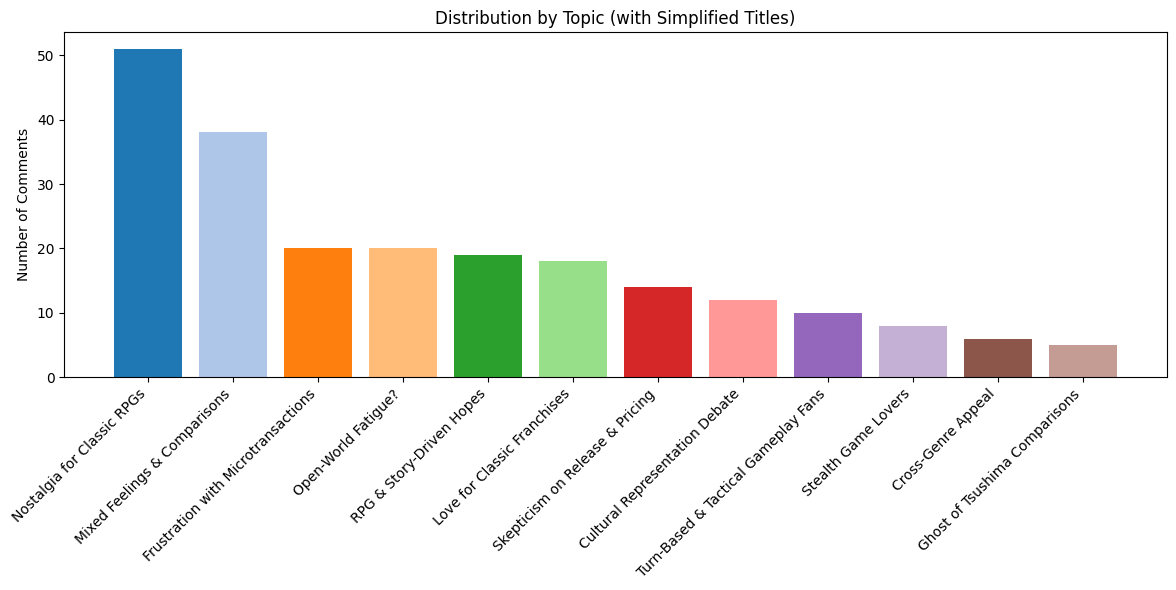

In [ ]:
#draw
plt.figure(figsize=(12,6))
colors = plt.cm.tab20.colors  # 20色分类调色板
plt.bar(topic_df['Simplified Title'], topic_df['Count'], color=colors[:len(topic_df)])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Comments')
plt.title('Distribution by Topic (with Simplified Titles)')
plt.tight_layout()
plt.show()

###5.2 Sentiment Distribution

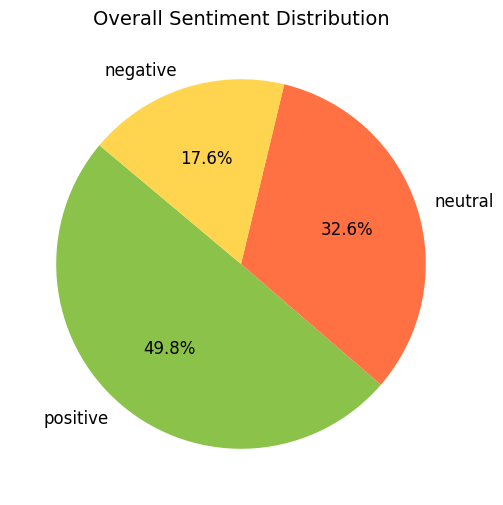

In [ ]:
# preparation
sentiment_counts = sentiment_df['sentiment_label'].value_counts()

# draw pie chart
plt.figure(figsize=(6,6))
colors = ['#8BC34A', '#FF7043', '#FFD54F']  # positive: 绿色, negative: 红橙, neutral: 柠檬黄
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize':12})
plt.title('Overall Sentiment Distribution', fontsize=14)
plt.show()

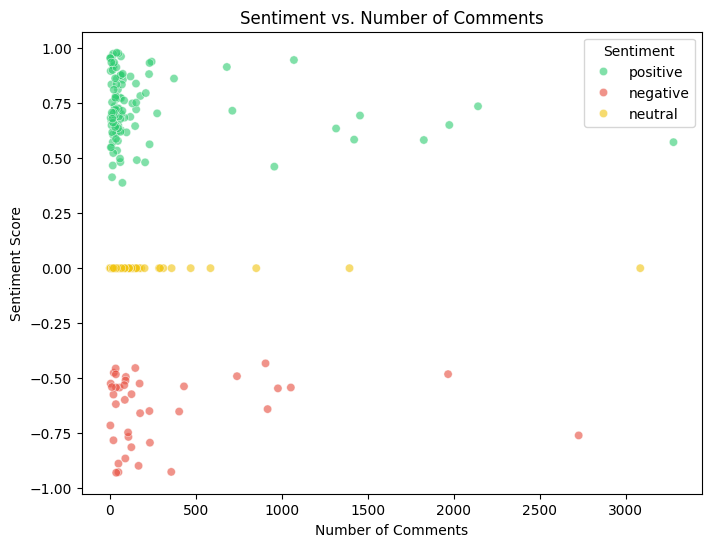

In [ ]:
#comments scatters
plt.figure(figsize=(8,6))
sns.scatterplot(data=sentiment_df, x='num_comments', y='sentiment', hue='sentiment_label', palette={'positive':'#2ecc71','negative':'#e74c3c','neutral':'#f1c40f'}, alpha=0.6)
plt.xlabel('Number of Comments')
plt.ylabel('Sentiment Score')
plt.title('Sentiment vs. Number of Comments')
plt.legend(title='Sentiment')
plt.show()

###5.3 all topic key words cloud

In [ ]:
#preparation
all_keywords_text = ', '.join(topic_result['Keywords'].astype(str))
custom_stopwords = {"feel", "dont", "look", "gon na","think"} # exclude certain stopwords

In [ ]:
#draw
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='tab20',
    max_words=200,
    stopwords=custom_stopwords
).generate(all_keywords_text)

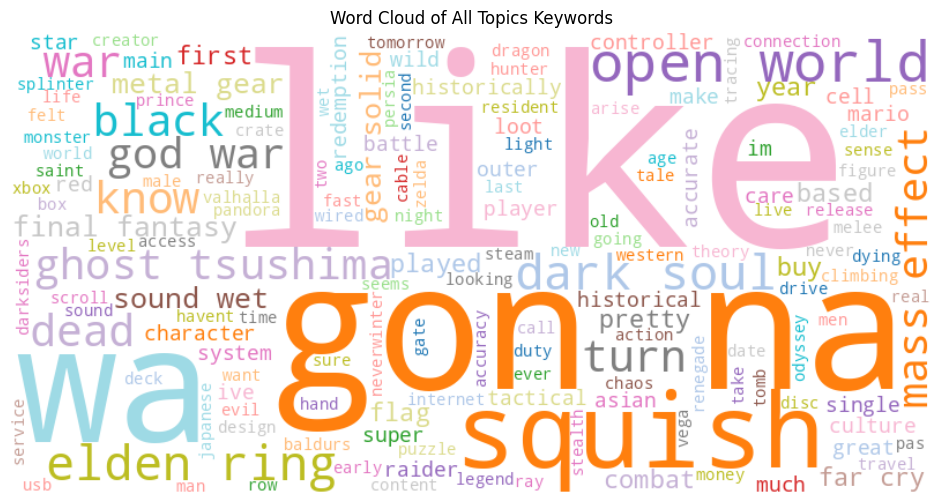

In [ ]:
#show
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Topics Keywords')
plt.show()